In [15]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary

In [16]:
model = torch.load('model.pt')
model = model.cuda()
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#summary(model, (3,32,32))

In [12]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testLoader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
criterion = nn.CrossEntropyLoss()
lr = 0.01
epochs = 50
opt = optim.SGD(model.parameters(), lr = lr, momentum=0.9)

In [14]:
epoch_loss = []
epoch_acc_train = []
epoch_acc_test = []
for epoch in range(epochs):
    running_loss = []
    running_acc_train = 0
    running_acc_test = 0
    number = 0
    #trainning
    for i, data in enumerate(trainLoader, 0):
        input_imgs, labels = data
        input_imgs, labels = input_imgs.to('cuda:0'), labels.to('cuda:0')
        
        opt.zero_grad()

        outputs = model(input_imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        opt.step()
        running_loss.append(loss.item()*labels.size(0))

    #testing
    with torch.no_grad():
        for data in testLoader:
            input_imgs, labels = data
            input_imgs, labels = input_imgs.to('cuda:0'), labels.to('cuda:0')
            outputs = model(input_imgs)
            _, predicted = torch.max(outputs.data, 1)
            number += labels.size(0)
            running_acc_test += (predicted == labels).sum().item()
        for data in trainLoader:
            input_imgs, labels = data
            input_imgs, labels = input_imgs.to('cuda:0'), labels.to('cuda:0')
            outputs = model(input_imgs)
            _, predicted = torch.max(outputs.data, 1)
            number += labels.size(0)
            running_acc_train += (predicted == labels).sum().item()

    loss_mean = np.sum(running_loss)/50000
    epoch_acc_test.append(5 * running_acc_test / number)
    epoch_acc_train.append(running_acc_train / number)
    epoch_loss.append(loss_mean)
    print("Accuracy: {}/{}, Loss: {}".format(epoch_acc_test[-1], epoch_acc_train[-1], loss_mean))
    print("epoch:", epoch+1, "complete!")

Accuracy: 0.6615833333333333/0.6913666666666667, Loss: 0.7494809774780273
epoch: 1 complete!
Accuracy: 0.7099166666666666/0.7578666666666667, Loss: 0.4001235502147675
epoch: 2 complete!
Accuracy: 0.7185/0.7845, Loss: 0.2639212002658844
epoch: 3 complete!
Accuracy: 0.7315833333333334/0.8075833333333333, Loss: 0.17155680057525635
epoch: 4 complete!
Accuracy: 0.7266666666666667/0.80885, Loss: 0.12945562600135804
epoch: 5 complete!
Accuracy: 0.727/0.8082333333333334, Loss: 0.09301427054643631
epoch: 6 complete!
Accuracy: 0.7314166666666667/0.8191166666666667, Loss: 0.08327081694364548
epoch: 7 complete!
Accuracy: 0.7336666666666667/0.81935, Loss: 0.062088013920783995
epoch: 8 complete!
Accuracy: 0.7293333333333333/0.8203666666666667, Loss: 0.05386676164805889
epoch: 9 complete!
Accuracy: 0.7280833333333333/0.82265, Loss: 0.041678454838097095
epoch: 10 complete!
Accuracy: 0.7368333333333333/0.8275166666666667, Loss: 0.04123160070925951
epoch: 11 complete!
Accuracy: 0.7320833333333333/0.8265

In [17]:
torch.save(model, "trained.pt")

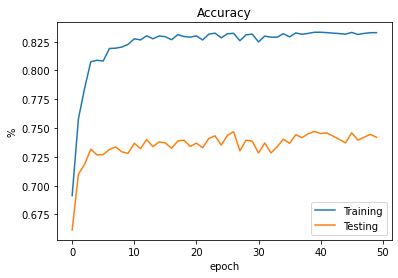

In [18]:
l = np.arange(0, len(epoch_acc_train))
plt.plot(l, epoch_acc_train, label="Training")
plt.plot(l, epoch_acc_test, label="Testing")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("%")
plt.legend()
plt.savefig("Accuracy")

No handles with labels found to put in legend.


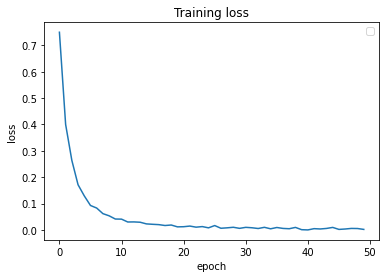

In [19]:
l = np.arange(0, len(epoch_loss))
plt.plot(l, epoch_loss)
plt.title("Training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.savefig("Loss")

In [20]:
test_acc = [0.6, 0.7, 0.8, 0.9, 0.9, 0.9, 0.9]
test_loss = [2, 1.9, 1.5, 1.3, 1.2, 1.1, 0.5]
